In [1]:
#packages import
import os
os.chdir('..') #cd to PiperNET folder

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.rnaseq_utils import *

#matplotlib settings
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'

#config file path
config_path = Path('config/rnaseq_dataprep.yaml')

In [2]:
### Data import ###

#proteomes
proteome_list = get_config(config_path, data='proteome_csv')

for sample, path in proteome_list.items(): 
    proteome_list[sample] = pd.read_csv(path, index_col='id') #update proteome_list with dfs

#unique df with all proteomes
proteomes_all = pd.DataFrame()
for sample, proteome in proteome_list.items(): #iterate over each proteome in proteome_list
    proteome['sample'] = sample #add 'sample' column with sample name (e.g., piepr09)
    proteome.columns = [col.split('_', 1)[1] if 'rep' in col else col for col in proteome.columns] #remove sample name from tpm cols
    proteomes_all = pd.concat([proteomes_all, proteome]) #concat df


#sonicparanoid
sonicpd_path = get_config(config_path, data='various', file='sonicparanoid')
sonicpd = import_sonicpd(sonicpd_path)

#blastDB paths
blastDB_paths = get_config(config_path, data='blastDB')

#sequences paths
seq_paths = get_config(config_path, data='enzymeDB')

#prefixes
prefixes = get_config(config_path, data='prefix', filepaths=False)

# Count PKS in each species based on Pfam domain
Potential PKS sequences counted in each transcriptome based on presence of 'PF00195' or 'PF02797 domain

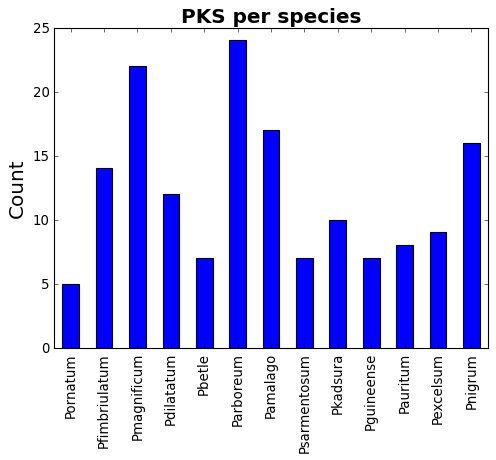

In [43]:
pks = proteomes_all[proteomes_all['pfam'].str.contains('PF00195|PF02797', na=False)] #keep 'PF00195' or 'PF02797
pks_count = pks.groupby('sample').size() #count pks per sample

#rename using species_names
species_names = get_config(config_path, data='species', filepaths=False)
pks_count.rename(index=species_names, inplace=True)

#bar plot
plt.figure(figsize=(7,5))
pks_count.plot(kind='bar')
plt.title('PKS per species', fontdict={'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('')
plt.ylabel('Count', fontdict={'fontsize': 18})
plt.show()

# BLASTp PKS sequences
PKS sequences in enzymeDB are BLASTed against all my transcriptomes. 

In [47]:
#keep only PKS sequences
enzymeDB = pd.read_csv('data/rna-seq/enzymeDB.csv')
pks_seqs = enzymeDB[enzymeDB['Class'] == 'PKS'] #keep all PKS
# pks_seqs = enzymeDB[enzymeDB['Enzyme'].isin(['PmCHS', #keep specific PKS
#                                              'PmSPS1',
#                                              'PmSPS2',
#                                              'PnFDS1',
#                                              'PnFDS2',
#                                              'ClDCS'])]


#BLASTp all seqs vs all proteomes
pks_paths = {k: v for k, v in seq_paths.items() if k in pks_seqs['Enzyme'].values}
hits_all = run_blastp(pks_paths, blastDB_paths, min_cov=50, min_sim=50)

#create sample column based on hit's prefix
hits_all['sample'] = hits_all['hit'].str.split('_').str[0] + '_'
hits_all['sample'] = hits_all['sample'].map({k: v for v, k in prefixes.items()})

Querying data/rna-seq/enzyme_seq/AaOKS1.fasta in piper06 transcriptome...
3 hits found for AaOKS1 in piper06 transcriptome.
Querying data/rna-seq/enzyme_seq/AaOKS1.fasta in piper09 transcriptome...
12 hits found for AaOKS1 in piper09 transcriptome.
Querying data/rna-seq/enzyme_seq/AaOKS1.fasta in piper10 transcriptome...
10 hits found for AaOKS1 in piper10 transcriptome.
Querying data/rna-seq/enzyme_seq/AaOKS1.fasta in piper12 transcriptome...
5 hits found for AaOKS1 in piper12 transcriptome.
Querying data/rna-seq/enzyme_seq/AaOKS1.fasta in piper20 transcriptome...
3 hits found for AaOKS1 in piper20 transcriptome.
Querying data/rna-seq/enzyme_seq/AaOKS1.fasta in piper23 transcriptome...
19 hits found for AaOKS1 in piper23 transcriptome.
Querying data/rna-seq/enzyme_seq/AaOKS1.fasta in piper25 transcriptome...
10 hits found for AaOKS1 in piper25 transcriptome.
Querying data/rna-seq/enzyme_seq/AaOKS1.fasta in piper26 transcriptome...
7 hits found for AaOKS1 in piper26 transcriptome.
Quer